## Klasyfikacja typów pojazdów
## Projekt zaliczeniowy z przedmiotu Źródła i Reprezentacja Danych

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix

# Wczytanie danych
df = pd.read_csv("vehicle_data_large.csv")
df.head()

,doors,power,weight,drive_type,vehicle_type
0,4,132,2048,AWD,sedan
1,5,300,2615,FWD,SUV
2,2,310,1581,FWD,sedan
3,4,121,1737,RWD,van
4,4,165,1977,RWD,sedan


 ## Eksploracja danych

In [18]:
print(df.info())
print(df.describe())
print(df['vehicle_type'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   doors         39 non-null     int64 
 1   power         39 non-null     int64 
 2   weight        39 non-null     int64 
 3   drive_type    39 non-null     object
 4   vehicle_type  39 non-null     object
dtypes: int64(3), object(2)
memory usage: 1.7+ KB
None
           doors       power       weight
count  39.000000   39.000000    39.000000
mean    3.589744  215.974359  1905.487179
std     1.185836   76.134053   544.547029
min     2.000000   82.000000   904.000000
25%     2.500000  145.000000  1545.500000
50%     4.000000  229.000000  1977.000000
75%     5.000000  294.000000  2194.000000
max     5.000000  328.000000  2874.000000
vehicle_type
van            10
pickup          7
sedan           6
SUV             5
hatchback       5
convertible     3
coupe           3
Name: count, dtype: int64


## Przygotowanie danych i trening modelu

In [19]:
X = df.drop('vehicle_type', axis=1)
y = df['vehicle_type']

numeric_features = ['power', 'weight', 'doors']
categorical_features = ['drive_type']

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(), categorical_features)
])

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

## Ewaluacja modelu

              precision    recall  f1-score   support

         SUV       1.00      0.50      0.67         2
 convertible       0.00      0.00      0.00         1
       coupe       0.00      0.00      0.00         1
   hatchback       0.00      0.00      0.00         2
      pickup       0.00      0.00      0.00         1
       sedan       0.00      0.00      0.00         2
         van       0.00      0.00      0.00         3

    accuracy                           0.08        12
   macro avg       0.14      0.07      0.10        12
weighted avg       0.17      0.08      0.11        12



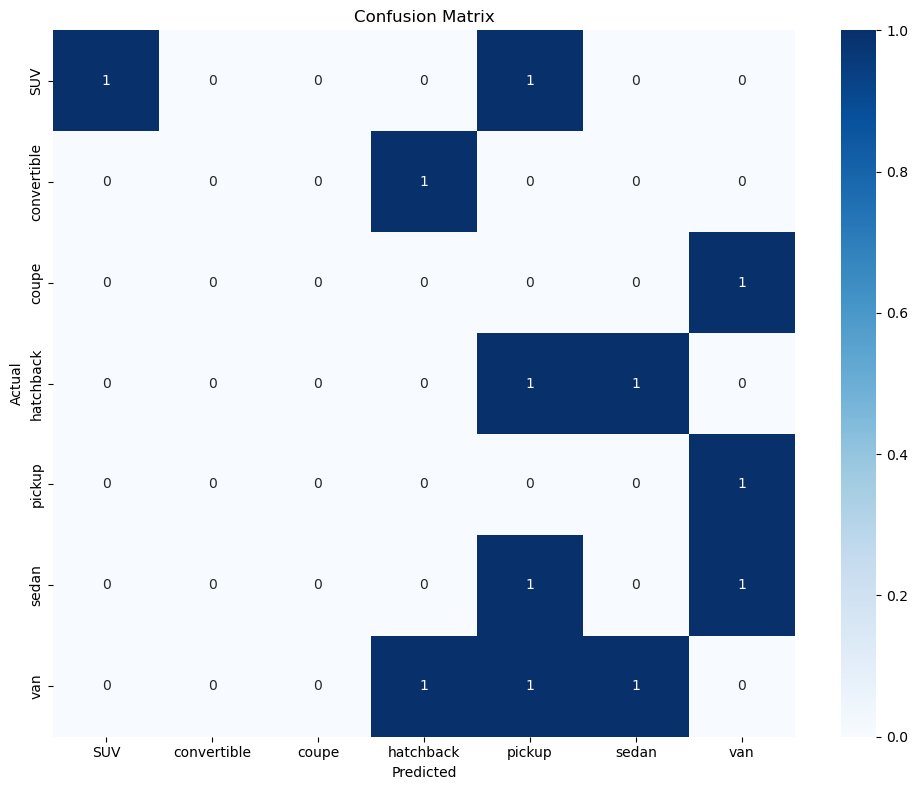

In [20]:
print(classification_report(y_test, y_pred, zero_division=0))

labels = np.unique(np.concatenate([y_test, y_pred]))
conf_matrix = confusion_matrix(y_test, y_pred, labels=labels)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", xticklabels=labels, yticklabels=labels, cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

## Zapis i odczyt modelu z pliku

In [21]:
# Zapis modelu
with open("vehicle_classifier_modified.pkl", "wb") as f:
    pickle.dump(pipeline, f)

# Wczytanie modelu
with open("vehicle_classifier_modified.pkl", "rb") as f:
    model = pickle.load(f)

# Przykład predykcji
example = pd.DataFrame([{
    'power': 180,
    'weight': 1600,
    'doors': 4,
    'drive_type': 'FWD'
}])
print("Predykcja typu pojazdu:", model.predict(example)[0])

Predykcja typu pojazdu: van
